# Hands-On ML: Chapter 6, Decision Trees

Like SVM, Decision Trees are a must-have in the ML toolkit. It is incredibly versatile-- it can solve classification, regression and even multioutput tasks. In addition, decision trees form the basis of Random Forest, one of the most powerful machine learning algorithms avaliable today.

Summary

1. CART classification
2. Gini vs Entropy
3. Hyperparameters
4. CART regression
5. Limitations of CART models

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] #this is the petal length and width features
y = iris.target #flower type
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [2]:
#From the major benefits of simple decision trees is that you can visualize it
from IPython.display import Image
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,
               out_file = './dot_files/iris_tree.dot',
               feature_names = iris.feature_names[2:],
               class_names = iris.target_names,
               rounded = True,
               filled = True)

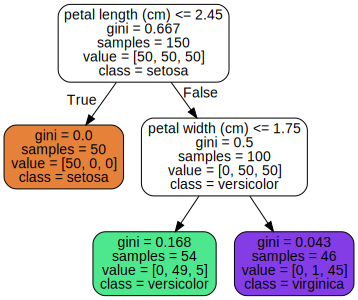

In [3]:
#Use brew install graphviz for MAC
import graphviz
with open("./dot_files/iris_tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### Making Predictions

Lets follow this diagram to see how a simple decision tree makes a decision. You begin at the `root node`, depth = 0. The decision rule is <= 2.45 petal length moves to the left and > 2.45 petal length moves to the left. The original is a `leaf node`, it terminates and does not ask any other questions-- the class is setosa. The right is a `child node` and you continue with a new decision rule, <= 1.75 petal width. Hence, this simple tree will categorize the flowers into *setosa*, *versicolor* and *virginica*.

The `sample` attribute above tells us how many instances this decision rule was applied to. For example, the right child applied to 100 samples, which is 66.7% of our training data. The `gini` attribute tells us that the impurity was measured using Gini Impurity.

**White Box vs Black Box**: Simple CART models are describe as white boxes. It is fairly clear which feature and rule contributed to a certain classification or regression prediction. Conversely, models like neural nets or random forest are described as black boxes. It is a lot harder to say which features + rules contributed to a certain prediction.

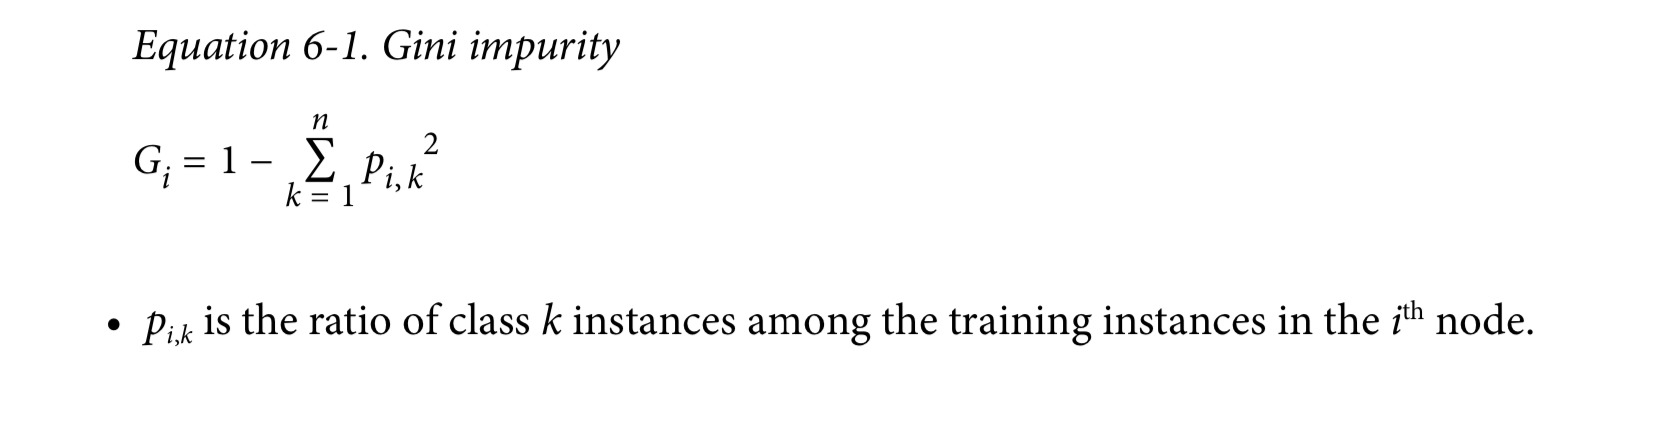

In [4]:
Image(filename = './images/gini_impurity.png')

The gini impurity measure is quite simple. The lower Gi, the higher purity. If a node has evenly distribute ratios for k classes, they will register a relatively small sum(p^2) and Gi will be large. However, as the ratio of one class tends to 1, Gi will tend to zero. Another measure we will discuss is entropy. The benefit of Gini impurity is that it is computationally less taxing.

In [5]:
#Predictions are simple, it'll just traverse the tree and output a class probability
#The probability is simply the samples/total observations in the training data.
#Every instance that falls into a particular leaf node will have the same class probability
print(tree_clf.predict_proba([[5, 1.5]])) #90.7% in index 1
tree_clf.predict([[5, 1.5]]) #predicts class in index 1

[[0.         0.90740741 0.09259259]]


array([1])

### CART Training Algorithm

Sklearn uses CART(Classification and Regression Tree) algorithm to train its trees. The loss function is quite simple. For each split, there are parameters k and tk. k is the feature and tk is the threshold related to the feature. `m_left/m` and `m_right/m` measures the weight of instances affected by this split; there is less value of creating a left node of 99% purity if it only contains 0.01% of sample. `G_left` and `G_right` is the purity measure of the node. Hence, the goal is to search for (k, tk) pair at each node that minimizes J(k, tk).

Unfortunately, solving *the* optimal tree is an **NP-Complete** problem. It has complexity O(exp(m)). Instead of solving optimal, we will just solve to reasonably good. This is done by controlling the hyperparameters `min_samples_split`, `min_sam ples_leaf`, `min_weight_fraction_leaf`, and `max_leaf_nodes`.

Fortunately, prediction complexity is quite low. The algorithm simply needs to traverse the trained tree. Hence, the computational complexity is around O(log2(m)). That means at a point, increasing number of predictions m will have near no impact on run time.

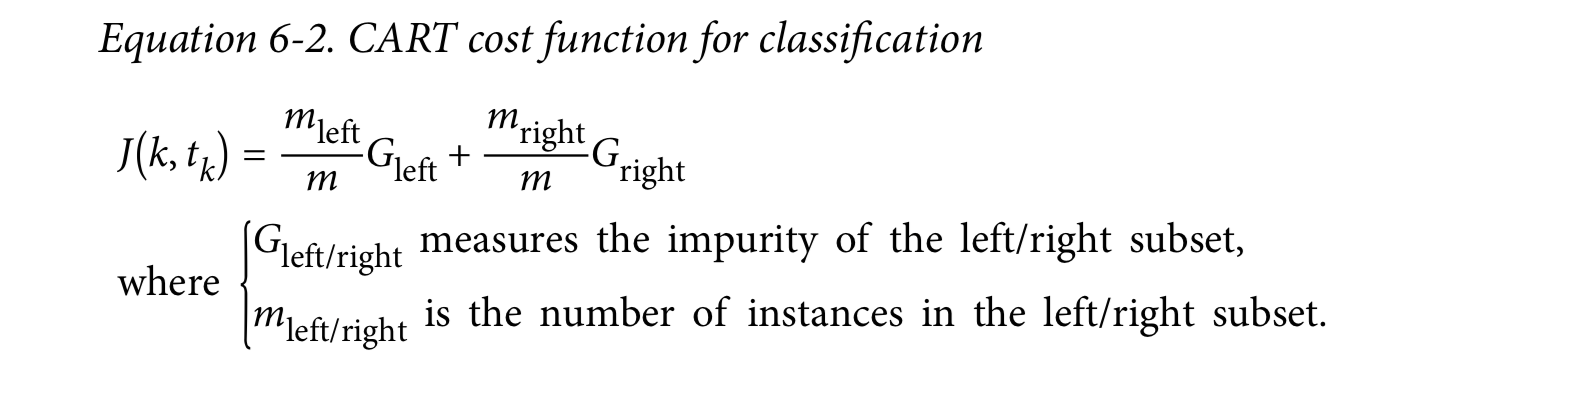

In [6]:
Image(filename = './images/cart_training.png')

### Gini Impurity vs Entropy

Gini impurity is computationally easier to train, and most of the time, both measures will result in very similar trees. However, entropy may lead to more balance trees-- Gini may isolate a frequent class in one branch and split on that whereas entropy may have that class spread out and capture more minute relationships between this high frequency class and another class. 

Entropy wraps back to the idea of information. There is more information when highly skewed events occur. When the classes are evenly distributed, pi,k will be relatively small and the log() will produce a very negative number-- which sums to a large Hi. When the classes are skewed and one class has a high pi,k, the ratio will be closer to 1 and log() will be closer to zero. The rest of the terms may be highly negative but they'll have a tiny weight pi,k. Hence Hi will be small.

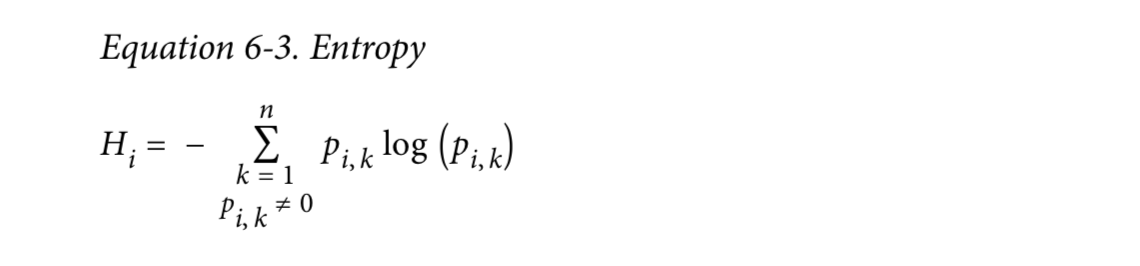

In [7]:
Image(filename = './images/entropy_tree.png')

### Regularization Hyperparameters

Regularization is extremely important to decision trees. Most models make strong assumptions about the data-- e.g. linear regression assumes the underly relationship is linear. Decision trees, however, is very versatile and can fit many relationships when left to its own device. Hence, to prevent overfitting, we have to tune hyperparameters that ensures the model is generalizable.

We often describe these as `non-parametric` models, not because they don't have parameters, but that the **number** of parameters is not determined prior to training. The process of training itself determines how many parameters.

**Hyperparameters:**

`max_depth` : Determines how many node levels the tree can have

`min_samples_split` : Minimum number of observations each node must have before it can split

`min_samples_leaf` : Minimum number of observations each leaf must have

`min_weight_fraction_leaf` : Same as min_samples_leaf but expressed as a fraction instead of number

`max_leaf_nodes` : Maximum number of leaf nodes

`max_features` : Maximum number of features evaluated for a split


**Pruning by hypothesis testing**

Another approach to control overfitting is to test of significance. For each node where all its childrens are leaf nodes (hence it terminates in the next layer), we can perform a chi-square test to test if this node is even necessary. The null hypothesis is that the improvement we observed is from random chance and the alternative is that it is not. p-value will tell us the probability of observing evidence as extreme as this.

## Tree Regression

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 3)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
#From the major benefits of simple decision trees is that you can visualize it
export_graphviz(tree_reg,
               out_file = './dot_files/iris_tree_reg.dot',
               #feature_names = iris.feature_names[2:],
               #class_names = iris.target_names,
               rounded = True,
               filled = True)

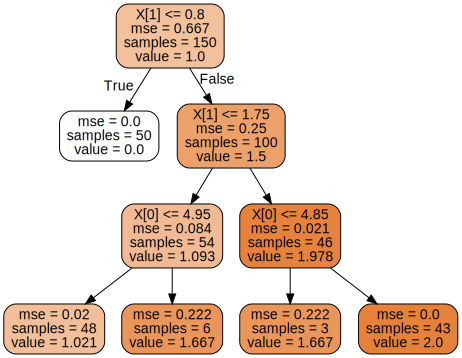

In [20]:
with open("./dot_files/iris_tree_reg.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

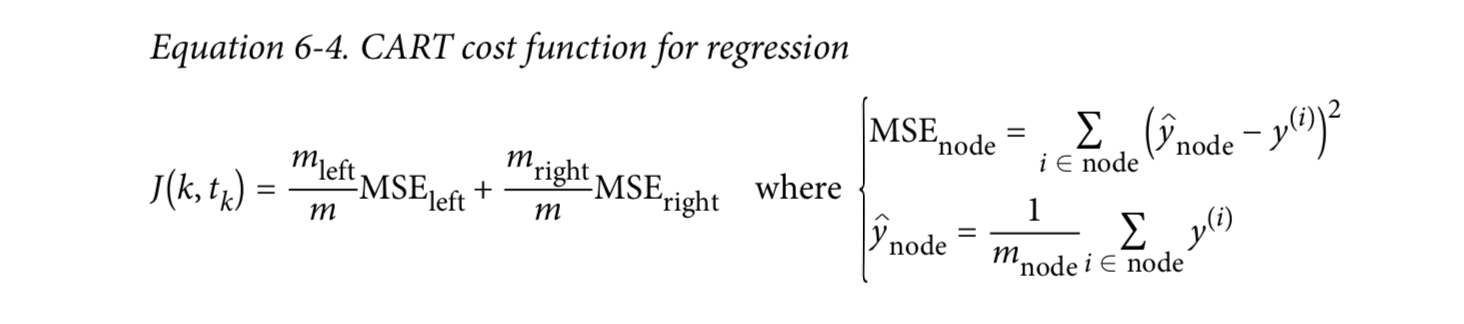

In [21]:
Image(filename = './images/cart_regression_mse.png')

The simple regression tree is very similar to our classification tree above. Instead of predicting a class in a leaf node, it predicts a value instead. The major difference is that instead of measuring impurity and using that in our loss function, we are measuring MSE and using that in our loss function. Like classification, each split will consider (k, tk) combinations that minimizes MSE (where k is a feature and tk is the rule). Notice how every node has an estimated value, not just the leaf node. That is because regression trees typically estimate the average of the values in a node as y-hat. So despite being internal nodes, they can still produce a value estimate.

## Limitations of Decision Trees

**Instability**: Decision trees can be very instable. The first problem is overfitting as we mentioned. The second is that simple decision trees create orthogonal boundaries. That means data that is rotated (e.g, positive linear relationship between x1 and x2) will be difficult for the tree to fit. The typical solution to this is `PCA` which will help us orientate the data better. The last and most critical problem with simple decision trees is their sensitivity to small variances. Small changes in the data (e.g. a new sample) may set the tree on a completely different path, resulting in different splits and a completely different model despite the same underlying relationships in the data.


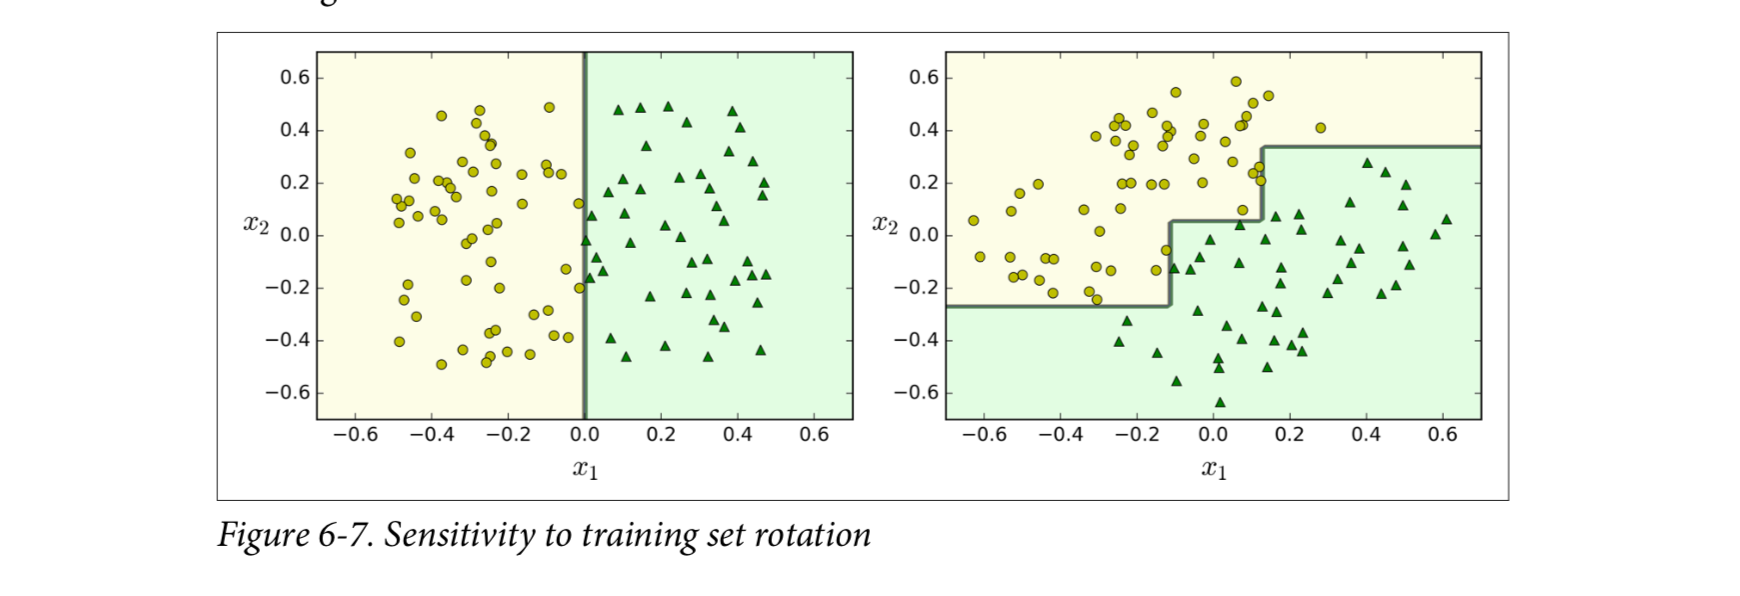

In [23]:
Image(filename = './images/cart_orthogonal_limit.png')